In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from matplotlib import cm

# Import custom functions
from util import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

# Define colors
colormap = cm.tab20.colors
viridis = cm.get_cmap('viridis', 12)
process_colors = [viridis(0.95), viridis(0.6), viridis(
    0.45), 'red', 'orange', 'grey', viridis(0.2)]

# Load the data
with open('../../data/monte_carlo_individual.pkl', 'rb') as f:
    monte_carlo_individual = pickle.load(f)

with open('../../data/monte_carlo_all_params.pkl', 'rb') as f:
    monte_carlo_dict = pickle.load(f)

# X = excavation
# T = transportation
# B = beneficiation
# R = reactor
# E = electrolysis
# L = liquefaction
# S = storage

storage_label = 0
liquefaction_label = 1
electrolysis_label = 2
transportation_label = 3
excavation_label = 4
beneficiation_label = 5
hydrogen_reduction_label = 6

ilmenite_wt = np.linspace(1, 16, 31)
wt_10 = np.argwhere(ilmenite_wt == 10)[0][0]

# Storage, Liquefaction, Electrolysis, Transportation, Excavation, Beneficiation, Reactor
process_indexes = [storage_label, liquefaction_label, electrolysis_label,
                   transportation_label, excavation_label, beneficiation_label, hydrogen_reduction_label]
process_labels = ['Storage', 'Liquefaction', 'Electrolysis',
                  'Transportation', 'Excavation', 'Beneficiation', 'Hydrogen reduction']

process_parameters = {
    'Excavation': ['cohCoeff', 'intAngle', 'extAngle'],
    'Transportation': ['motor_efficiency', 'mRover'],
    'Beneficiation': ['enrichment_factor', 'benef_ilmenite_recovery'],
    'Hydrogen reduction': ['batch_reaction_time_in_hours', 'CFI_thickness', 'HTMLI_thickness', 'delta_T_insulation', 'reactor_heat_up_time_in_hours', 'T_regolith_in', 'T_pre_heater', 'enrichment_factor', 'benef_ilmenite_recovery'],
    'Electrolysis': ['system_efficiency'],
    'Liquefaction': ['cryocooler_efficiency', 'T_hot_reservoir_carnot_cycle', 'T_of_incoming_oxygen'],
    'Storage': ['vip_thickness', 'vip_thermal_conductivity', 'vip_emissivity', 'cryocooler_efficiency_storage']
}

# Overall uncertainty

/home/freya/anaconda3/envs/pyhat/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


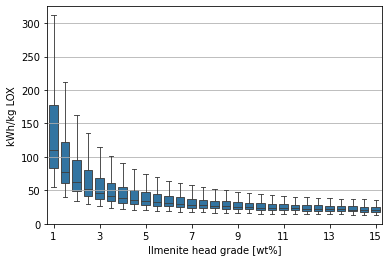

In [29]:
total_df = pd.DataFrame(monte_carlo_dict[1], columns=np.linspace(1, 16, 31))
plt.figure(figsize=(6, 4))
plt.gca().grid(axis='y')
sns.boxplot(data=total_df,color='C0',width=0.75, fliersize=0.5, linewidth=0.9, showfliers=False, dodge=False) # To show outliers, set showfliers=True
plt.gca().set_xlabel('Ilmenite head grade [wt%]')
plt.gca().set_ylabel('kWh/kg LOX')

plt.xticks([0, 4, 8, 12, 16, 20, 24, 28],[1, 3, 5, 7, 9, 11, 13, 15])
plt.gca().set_xlim((-0.55, 28.55))
plt.gca().set_ylim((0., 325))
plt.gca().set_xlim((-0.55, 28.55))

plt.savefig('systematics_quantiles.png', bbox_inches='tight', dpi=400)

# Per parameter

In [31]:
non_constant_keys = []
for key in monte_carlo_individual.keys():
    q1 = np.quantile(monte_carlo_individual[key][1], 0.25, axis=0)
    q3 = np.quantile(monte_carlo_individual[key][1], 0.75, axis=0)
    median = np.median(monte_carlo_individual[key][1], axis=0)
    
    q1_av = np.mean(q1, axis=0)
    q3_av = np.mean(q3, axis=0)
    median_av = np.mean(median, axis=0)

    q1_std = np.std(q1/median*100, axis=0)
    q3_std = np.std(q3/median*100, axis=0)
    
    q1_av = np.mean(q1/median*100, axis=0)
    q3_av = np.mean(q3/median*100, axis=0)    
    
    q1_diff = (np.max(q1/median*100) - np.min(q1/median*100))/2
    q3_diff = (np.max(q3/median*100) - np.min(q3/median*100))/2
    
    extra = ''
    diff = (q1_diff + q3_diff)/2

    if (diff > 1.):
        extra = f' --> not constant, diff {q1_diff:.2f}, {q3_diff:.2f}'
        non_constant_keys.append(key)
    print(key, f'q1: {np.around(q1_av,2)}, q2: {np.around(q3_av,2)}, {extra}')

cryocooler_efficiency q1: 99.53, q2: 100.6, 
T_hot_reservoir_carnot_cycle q1: 98.66, q2: 101.21, 
T_of_incoming_oxygen q1: 99.91, q2: 100.07, 
enrichment_factor q1: 86.34, q2: 130.94,  --> not constant, diff 6.99, 19.90
benef_ilmenite_recovery q1: 99.85, q2: 100.24, 
motor_efficiency q1: 99.9, q2: 100.14, 
mRover q1: 99.94, q2: 100.06, 
cohCoeff q1: 100.0, q2: 100.0, 
intAngle q1: 100.0, q2: 100.0, 
extAngle q1: 100.0, q2: 100.0, 
vip_thickness q1: 99.73, q2: 100.32, 
vip_thermal_conductivity q1: 99.72, q2: 100.24, 
vip_emissivity q1: 99.9, q2: 100.12, 
cryocooler_efficiency_storage q1: 99.88, q2: 100.16, 
batch_reaction_time_in_hours q1: 95.52, q2: 103.38,  --> not constant, diff 1.69, 1.38
CFI_thickness q1: 97.69, q2: 102.07,  --> not constant, diff 1.43, 1.28
HTMLI_thickness q1: 99.87, q2: 100.24, 
delta_T_insulation q1: 98.4, q2: 101.74,  --> not constant, diff 0.99, 1.08
reactor_heat_up_time_in_hours q1: 99.84, q2: 100.22, 
T_regolith_in q1: 98.4, q2: 101.48,  --> not constant, di

Enrichment factor 36.34
Batch reaction time (hours) 5.0
CFI thickness (m) 2.54
$\Delta T$ (Insulation) 1.9
$T$ (Regolith in) 1.78
System efficiency 3.05


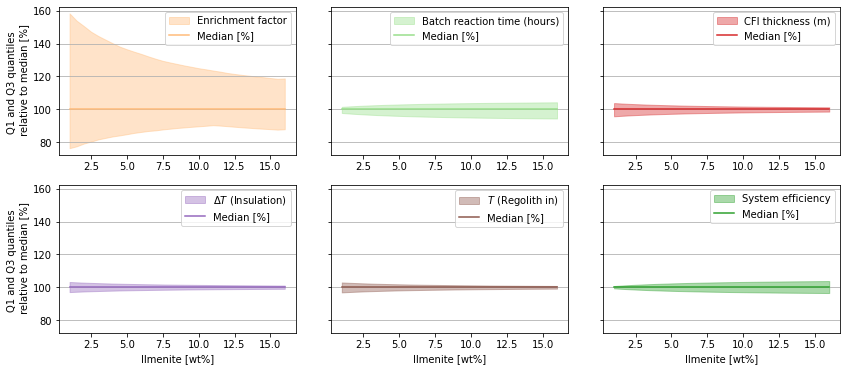

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(
    14, 6), sharex=False, gridspec_kw={'hspace': 0.2, 'wspace': 0.15}, sharey=True)

df = pd.DataFrame(
    {'Process': [], 'Relative uncertainty [%]': [], 'Parameter': []})

process_label = process_labels[6]
process_index = process_indexes[6]

for i, ax in enumerate(axs.ravel()):
    key = non_constant_keys[i]
    label = find_new_label_name(key)
    color = find_label_color(key)
    
    mu = np.mean(monte_carlo_individual[key][1][:], axis=0)
    std = np.std(monte_carlo_individual[key][1][:], axis=0)
    q1 = np.quantile(monte_carlo_individual[key][1][:], 0.25, axis=0)
    q3 = np.quantile(monte_carlo_individual[key][1][:], 0.75, axis=0)
    median = np.median(monte_carlo_individual[key][1][:], axis=0)
    
    print(label, np.around(np.mean(std/mu*100), 2))
    new_row = pd.DataFrame({'Process': [process_label],
                                'Relative uncertainty [%]': [np.around(std / mu * 100, 4)],
                                'Parameter': [label]})
    df = pd.concat([df, new_row], ignore_index=True)
        
    ax.fill_between(x=ilmenite_wt, y1=q1/median*100, y2=q3/median*100, alpha=0.4, color=color, label=label)
    ax.errorbar(ilmenite_wt, y=median/median*100, label='Median [%]', color=color)
    
    ax.grid(axis='y')
    ax.legend()

axs[0, 0].set_ylabel(
    'Q1 and Q3 quantiles \n relative to median [%]')
axs[1, 0].set_ylabel(
    'Q1 and Q3 quantiles \n relative to median [%]')
for _ in range(0, 3):
    axs[1, _].set_xlabel('Ilmenite [wt%]')

plt.savefig('systematics_per_process_per_param.png',
            dpi=400, bbox_inches='tight')

# Per process

In [52]:
df_wt_10 = pd.DataFrame(
    {'Process': [], 'Median': [], 'Q1': [], 'Q2': []})

for i, label in enumerate(process_labels):
    process_index = process_indexes[i]

    q1 = np.quantile(monte_carlo_dict[0][:, process_index], 0.25, axis=0)
    q3 = np.quantile(monte_carlo_dict[0][:, process_index], 0.75, axis=0)
    median = np.median(monte_carlo_dict[0][:, process_index], axis=0)
        
    new_row = pd.DataFrame({'Process': [label],
                            'Median': [np.around(median[wt_10], 3)],
                            'Q1': [np.around(q1[wt_10], 2)],
                            'Q2': [np.around(q3[wt_10], 2)],
                            })
    df_wt_10 = pd.concat([df_wt_10, new_row], ignore_index=True)
df_wt_10

,Process,Median,Q1,Q2
0,Storage,0.309,0.26,0.37
1,Liquefaction,1.158,0.95,1.40
2,Electrolysis,9.270,8.59,10.10
3,Transportation,0.145,0.11,0.20
4,Excavation,0.002,0.00,0.00
5,Beneficiation,0.145,0.11,0.20
6,Hydrogen reduction,13.061,10.31,19.28


In [35]:
df = pd.DataFrame(
    {'Parameter': [], 'Median': [], 'Q1': [], 'Q2': []})

for i, ax in enumerate(axs.ravel()):
    if i == 7:
        break
    process_label = process_labels[i]
    process_index = process_indexes[i]
    print(f'----- {process_label}')
    for key in process_parameters[process_label]:
        label = find_new_label_name(key)
        color = find_label_color(key)

        q1 = np.quantile(monte_carlo_individual[key][0][:, process_index], 0.25, axis=0)
        q3 = np.quantile(monte_carlo_individual[key][0][:, process_index], 0.75, axis=0)
        median = np.median(monte_carlo_individual[key][0][:, process_index], axis=0)
        
        new_row = pd.DataFrame({'Process': [process_label],
                                'Median': [np.around(median[wt_10], 2)],
                                'Q1': [np.around(q1[wt_10], 2)],
                                'Q2': [np.around(q3[wt_10], 2)],
                                })
        df = pd.concat([df, new_row], ignore_index=True)

----- Storage
----- Liquefaction
----- Electrolysis
----- Transportation
----- Excavation
----- Beneficiation


In [36]:
df

,Process,Median,Q1,Q2
0,Storage,0.63,0.55,0.73
1,Storage,0.63,0.54,0.70
2,Storage,0.62,0.58,0.65
3,Storage,0.31,0.28,0.36
4,Liquefaction,1.17,1.04,1.35
5,Liquefaction,2.38,1.98,2.74
6,Liquefaction,2.34,2.31,2.36
7,Electrolysis,9.32,8.54,10.15
8,Transportation,0.14,0.12,0.17
9,Transportation,0.14,0.13,0.15


In [20]:
df

,Process,Median,Q1,Q2
0,Storage,"[0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.6...","[0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.5...","[0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.7..."
1,Storage,"[0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.6...","[0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.54, 0.5...","[0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, ..."
2,Storage,"[0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.62, 0.6...","[0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.58, 0.5...","[0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.6..."
3,Storage,"[0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.31, 0.3...","[0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.28, 0.2...","[0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.36, 0.3..."
4,Liquefaction,"[1.17, 1.17, 1.17, 1.17, 1.17, 1.17, 1.17, 1.1...","[1.04, 1.04, 1.04, 1.04, 1.04, 1.04, 1.04, 1.0...","[1.35, 1.35, 1.35, 1.35, 1.35, 1.35, 1.35, 1.3..."
5,Liquefaction,"[2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.38, 2.3...","[1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.98, 1.9...","[2.74, 2.74, 2.74, 2.74, 2.74, 2.74, 2.74, 2.7..."
6,Liquefaction,"[2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2.34, 2.3...","[2.31, 2.31, 2.31, 2.31, 2.31, 2.31, 2.31, 2.3...","[2.36, 2.36, 2.36, 2.36, 2.36, 2.36, 2.36, 2.3..."
7,Electrolysis,"[9.32, 9.32, 9.32, 9.32, 9.32, 9.32, 9.32, 9.3...","[8.54, 8.54, 8.54, 8.54, 8.54, 8.54, 8.54, 8.5...","[10.15, 10.15, 10.15, 10.15, 10.15, 10.15, 10...."
8,Transportation,"[1.41, 0.94, 0.71, 0.56, 0.47, 0.4, 0.35, 0.31...","[1.21, 0.81, 0.61, 0.49, 0.4, 0.35, 0.3, 0.27,...","[1.7, 1.13, 0.85, 0.68, 0.57, 0.49, 0.42, 0.38..."
9,Transportation,"[1.41, 0.94, 0.71, 0.56, 0.47, 0.4, 0.35, 0.31...","[1.29, 0.86, 0.64, 0.52, 0.43, 0.37, 0.32, 0.2...","[1.53, 1.02, 0.77, 0.61, 0.51, 0.44, 0.38, 0.3..."


batch_reaction_time_in_hours 3.39
CFI_thickness 0.55
HTMLI_thickness 0.05
delta_T_insulation 0.41
reactor_heat_up_time_in_hours 0.05
T_regolith_in 0.54
T_pre_heater 1.28
enrichment_factor 4.59
benef_ilmenite_recovery 0.0


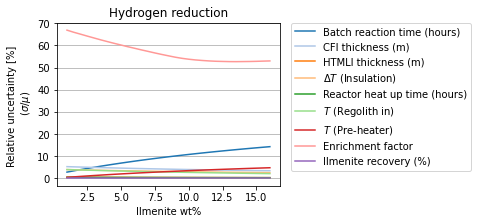

In [15]:
fig = plt.figure(figsize=(4, 3))
ax = plt.gca()
i = 6

process_label = process_labels[i]
process_index = process_indexes[i]

for i, key in enumerate(process_parameters[process_label]):
    label = find_new_label_name(key)
    color = colormap[i]  # find_label_color(key)
    mu = np.mean(monte_carlo_individual[key][0][:, process_index], axis=0)
    std = np.std(monte_carlo_individual[key][0][:, process_index], axis=0)
    ax.errorbar(ilmenite_wt, y=std/mu*100, label=label, color=color)
    if np.std(std/mu) > 0.:
        print(key, np.around(np.std(std/mu*100), 2))

if process_label == 'Hydrogen reduction':
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
else:
    ax.legend(loc='upper left', bbox_to_anchor=(.03, 0.9), borderaxespad=0.)
    ax.set_title(process_label)

ax.set_ylabel('Relative uncertainty [%] \n ($\sigma/\mu$) ')
ax.set_title('Hydrogen reduction')
ax.grid(axis='y')

ax.set_xlabel('Ilmenite wt%')
plt.savefig('systematics_hydrogen_reduction.png', dpi=300, bbox_inches='tight')

# At 10 % ilmenite

In [ ]:
print('Value at 10% ilmenite in kWh/kg LOX')
print('-'*36)
for i, l in enumerate(process_labels):
    print(l, np.around(mu_at_10_per_process, 3)[i])

print(' '*36)
print('Uncertainty at 10% ilmenite in kWh/kg LOX')
print('-'*41)
for i, l in enumerate(process_labels):
    print(l, np.around(stds_at_10_per_process, 3)[i])

print(' '*36)
print('Relative uncertainty at 10% ilmenite')
print('-'*36)
for i, l in enumerate(process_labels):
    print(l, np.around(relative_stds_at_10_per_process, 3)[i])

In [ ]:
stds_per_param = []
relative_stds_per_param = []

for i, l in enumerate(monte_carlo_individual.keys()):
    stds_per_param.append(
        (l, np.around(np.std(monte_carlo_individual[l][1], axis=0)[18], 3)))
    relative_stds_per_param.append(
        (l, np.around(np.std(monte_carlo_individual[l][1], axis=0)[18]/total_mu[18]*100, 3)))

stds_per_param.sort(key=lambda x: x[1], reverse=True)
relative_stds_per_param.sort(key=lambda x: x[1], reverse=True)

In [ ]:
i = np.linspace(1,99,99)
i = i / 100
print(i)
print((i[0:95:3]))

In [ ]:
print('='*36)
print('Relative uncertainty at 10% ilmenite')
print('='*36)

print('5 Largest uncertainty per parameter')
print('-'*36)
for i in range(0, 5):
    print(stds_per_param[i])

print(' '*36)
print('5 Largest relative uncertainty per parameter')
print('-'*44)
for i in range(0, 5):
    print(relative_stds_per_param[i])
